# Question 1: Extracting Tesla Stock Data using yfinance

In [ ]:
pip install yfinance

In [2]:
import yfinance as yf

# Ticker
tesla = yf.Ticker("TSLA")

# stock data
tesla_data = tesla.history(period="max")

# Reset and first 5 rows
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [16]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 59.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [18]:
import pandas as pd
import requests

# Set a browser-like user-agent header
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Get the page content with the spoofed header
response = requests.get(url, headers=headers)
html = response.text

# Now parse tables from the HTML
tables = pd.read_html(html)

# Preview tables to find the right one
for i, table in enumerate(tables):
    print(f"\nTable {i}\n")
    print(table.head())


Table 0

   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  

Table 1

  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2024-12-31   
1                                 2024-09-30   
2                                 2024-06-30   
3                                 2024-03-31   
4                                 2023-12-31   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $25,707  
1                                      $

/tmp/ipykernel_1462/3725406194.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


#  Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [19]:
tesla_revenue = tables[1]  # or whichever index it is
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r"[\$,]", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue.head()


,Date,Revenue
0,2024-12-31,25707.0
1,2024-09-30,25182.0
2,2024-06-30,25500.0
3,2024-03-31,21301.0
4,2023-12-31,25167.0


# Question 3: Extracting GameStop Stock Data Using yfinance

In [20]:
import yfinance as yf

# Create a Ticker object for GameStop
gamestop = yf.Ticker("GME")

# Get the full historical stock data
gme_data = gamestop.history(period="max")

# Reset index and display first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Extracting GameStop Revenue Data Using Webscraping

In [ ]:
import pandas as pd
import requests

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"
}

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

response = requests.get(url, headers=headers)
html = response.text

tables = pd.read_html(html)

gme_revenue = tables[1]

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace(r"[\$,]", "", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

gme_revenue.head()

/tmp/ipykernel_1462/1473691791.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


,Date,Revenue
0,2024-10-31,860
1,2024-07-31,798
2,2024-04-30,882
3,2024-01-31,1794
4,2023-10-31,1078


# Question 5: Tesla Stock and Revenue Dashboard

In [23]:
import yfinance as yf

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)


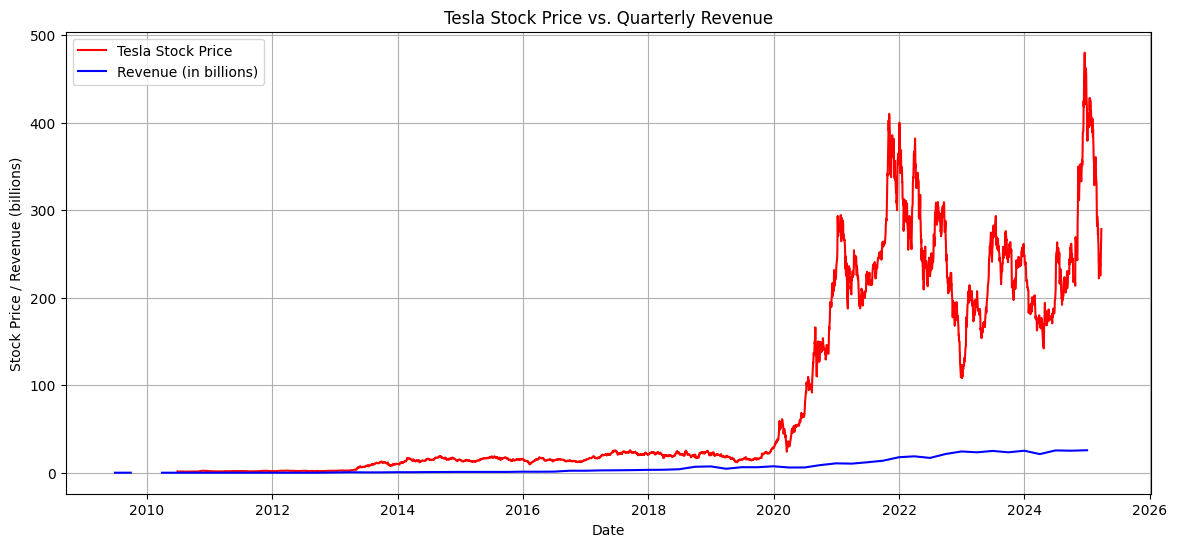

In [24]:
import matplotlib.pyplot as plt

# Ensure both DataFrames are ready: tesla_data, tesla_revenue

# Resize plot
plt.figure(figsize=(14,6))

# Plot stock closing prices
plt.plot(tesla_data["Date"], tesla_data["Close"], label="Tesla Stock Price", color='red')

plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"] / 1000, label="Revenue (in billions)", color='blue')

plt.title("Tesla Stock Price vs. Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Stock Price / Revenue (billions)")
plt.legend()
plt.grid(True)

plt.show()

# Question 6: GameStop Stock and Revenue Dashboard


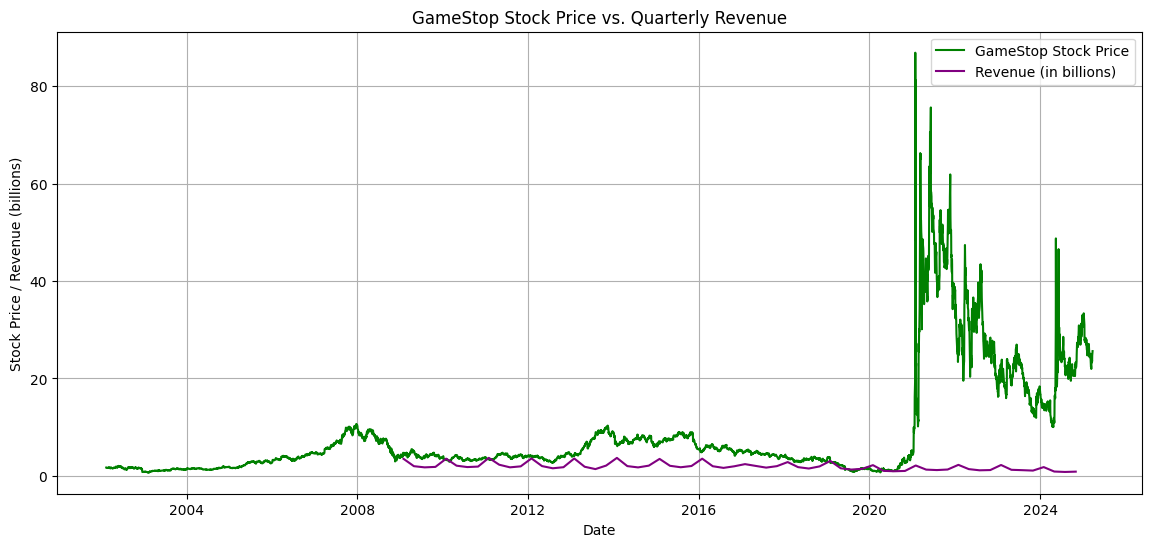

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(gme_data["Date"], gme_data["Close"], label="GameStop Stock Price", color='green')
plt.plot(gme_revenue["Date"], gme_revenue["Revenue"] / 1000, label="Revenue (in billions)", color='purple')
plt.title("GameStop Stock Price vs. Quarterly Revenue")
plt.xlabel("Date")
plt.ylabel("Stock Price / Revenue (billions)")
plt.legend()
plt.grid(True)
plt.show()
